In [1]:
!pip3 install fbprophet

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

Wikipedia page for Peyton Manning.

In [4]:
df = pd.read_csv('data/example_wp_peyton_manning.csv')
df[:3]

,ds,y
0,2007-12-10,14629
1,2007-12-11,5012
2,2007-12-12,3582


In [5]:
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [6]:
m = Prophet()
m.fit(df);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/luis/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [7]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.208171,7.481256,8.972520
3266,2017-01-16,8.533159,7.857332,9.275463
3267,2017-01-17,8.320549,7.620425,9.006494
3268,2017-01-18,8.153184,7.405131,8.925381
3269,2017-01-19,8.165106,7.394673,8.922188


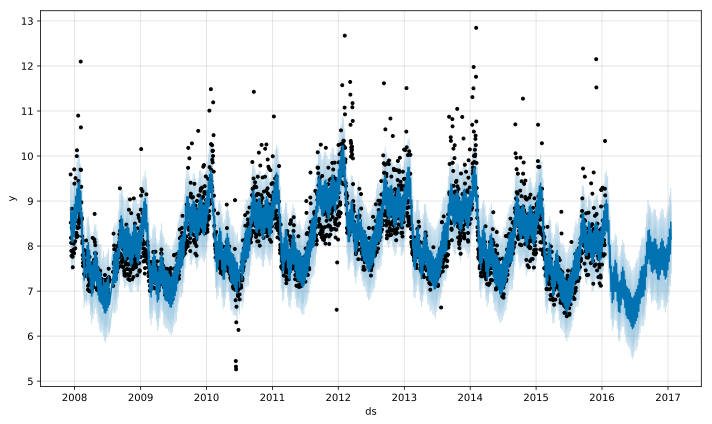

In [9]:
m.plot(forecast);

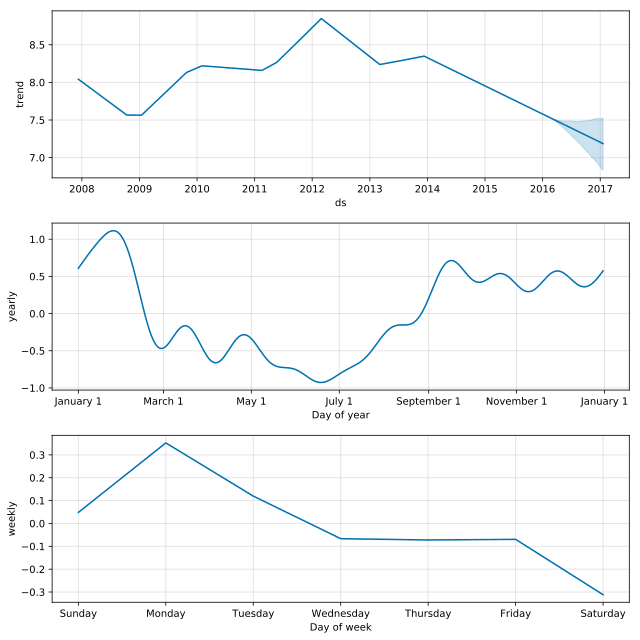

In [10]:
m.plot_components(forecast);